In [1]:
# Import necessary libraries
import pandas as pd
import ydata_profiling

Part 1. EDA and adding new data

In [2]:
# Import data set
df = pd.read_csv('fortune_global_500_from_2019-2021.csv')
df.head()

year  rank                      name     sector               industry  \
0  2019   1.0                   Walmart  Retailing  General Merchandisers   
1  2019   2.0             Sinopec Group     Energy     Petroleum Refining   
2  2019   3.0         Royal Dutch Shell     Energy     Petroleum Refining   
3  2019   4.0  China National Petroleum     Energy     Petroleum Refining   
4  2019   5.0                State Grid     Energy              Utilities   

   revenues  revchange  profits  prftchange    assets  employees       hqcity  \
0  514405.0        2.8   6670.0       -32.4  219295.0    2200000  Bentonville   
1  414649.9       26.8   5845.0       280.1  329186.3     619151      Beijing   
2  396556.0       27.2  23352.0        79.9  399194.0      81000    The Hague   
3  392976.6       20.5   2270.5         NaN  601899.9    1382401      Beijing   
4  387056.0       10.9   8174.8       -14.3  572309.5     917717      Beijing   

    hqstate newcomer profitable ceowoman jobgrowth  \
0  Arkansas       no        yes       no        no   
1       NaN       no        yes       no        no   
2       NaN       no        yes       no        no   
3       NaN       no        yes       no        no   
4       NaN       no        yes       no       yes   

                                           permalink  
0        https://fortune.com/global500/2019/walmart/  
1  https://fortune.com/global500/2019/sinopec-group/  
2  https://fortune.com/global500/2019/royal-dutch...  
3  https://fortune.com/global500/2019/china-natio...  
4     https://fortune.com/global500/2019/state-grid/

In [3]:
# As we don't need some columns, let's drop them:
df.drop(columns=['permalink','profitable', 'jobgrowth'], inplace=True)

In [4]:
#Let's check the number of rows and columns
df.shape

(1500, 15)

Seems that we missed some positions, lets find out it later

In [5]:
#Just in case remove white space around column names. Convert all column names into lowercase
df.columns = df.columns.str.strip().str.lower()

In [6]:
#Preview data set in order to identify any null values and errors.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1500 non-null   int64  
 1   rank        1500 non-null   float64
 2   name        1500 non-null   object 
 3   sector      1500 non-null   object 
 4   industry    1500 non-null   object 
 5   revenues    1500 non-null   float64
 6   revchange   1490 non-null   float64
 7   profits     1499 non-null   float64
 8   prftchange  1380 non-null   float64
 9   assets      1500 non-null   float64
 10  employees   1500 non-null   int64  
 11  hqcity      1494 non-null   object 
 12  hqstate     364 non-null    object 
 13  newcomer    1500 non-null   object 
 14  ceowoman    1500 non-null   object 
dtypes: float64(6), int64(2), object(7)
memory usage: 175.9+ KB


In [7]:
#Here i want to change datatype of "rank" column:
df['rank'] = df['rank'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1500 non-null   int64  
 1   rank        1500 non-null   int32  
 2   name        1500 non-null   object 
 3   sector      1500 non-null   object 
 4   industry    1500 non-null   object 
 5   revenues    1500 non-null   float64
 6   revchange   1490 non-null   float64
 7   profits     1499 non-null   float64
 8   prftchange  1380 non-null   float64
 9   assets      1500 non-null   float64
 10  employees   1500 non-null   int64  
 11  hqcity      1494 non-null   object 
 12  hqstate     364 non-null    object 
 13  newcomer    1500 non-null   object 
 14  ceowoman    1500 non-null   object 
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 170.1+ KB


In [9]:
#Profiling dataframe
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# I want to check that there is no misppelings in company names:
names_to_filter = sorted(df['name'].unique().tolist())
names_to_filter

['3M',
 'ABB',
 'ACS',
 'AEON',
 'AIA Group',
 'AT&#038;T',
 'AT&T',
 'AXA',
 'AbbVie',
 'Abbott Laboratories',
 'Accenture',
 'Achmea',
 'Adecco Group',
 'Adidas',
 'Aegon',
 'Agricultural Bank of China',
 'Air France-KLM Group',
 'Air Liquide',
 'Airbus',
 'Aisin',
 'Aisin Seiki',
 'Albertsons',
 'Albertsons Cos.',
 'Alfresa Holdings',
 'Alibaba Group Holding',
 'Alimentation Couche-Tard',
 'Allianz',
 'Allstate',
 'Alphabet',
 'Aluminum Corp. of China',
 'Amazon',
 'Amazon.com',
 'Amer International Group',
 'American Airlines Group',
 'American Express',
 'American International Group',
 'AmerisourceBergen',
 'Amgen',
 'América Móvil',
 'Anglo American',
 'Anheuser-Busch InBev',
 'Anhui Conch Group',
 'Ansteel Group',
 'Anthem',
 'Apple',
 'ArcelorMittal',
 'Archer Daniels Midland',
 'Archer Daniels Midland (ADM)',
 'Arrow Electronics',
 'Assicurazioni Generali',
 'AstraZeneca',
 'Auchan Holding',
 'Australia &#038; New Zealand Banking Group',
 'Aviation Industry Corp. of China',
 

In [11]:
#next step we replace incorrect names:
df['name'].replace({
    'AT&#038;T': 'AT&T',
    'Aisin': 'Aisin Seiki',
    'Albertsons Cos': 'Albertsons',
    'Amazon.com': 'Amazon',
    'Archer Daniels Midland (ADM)': 'Archer Daniels Midland',
    'China Aerospace Science &#038; Industry': 'China Aerospace Science & Industry',
    'China Aerospace Science &#038; Technology': 'China Aerospace Science & Technology',
    'China Resources': 'China Resources Land',
    'Financière de l&#8217;Odet': 'Financiere De Lodet',
    'Henan Energy &#038; Chemical': 'Henan Energy & Chemical',
    'Huawei Investment &#038; Holding': 'Huawei Investment & Holding',
    'Industrial &#038; Commercial Bank of China': 'Industrial & Commercial Bank of China',
    'JPMorgan Chase &#038; Co.': 'JPMorgan Chase',
    'Johnson &#038; Johnson': 'Johnson & Johnson',
    'Kia': 'Kia Motors',
    'L&#8217;Oréal': 'L’Oréal',
    'Lowe&#8217;': 'Lowe’s',
    'MS&#038;AD Insurance Group Holdings': 'MS&AD Insurance Group Holdings',
    'Macy&#8217;s': 'Macy’s',
    'Maersk Group': 'Maersk',
    'Nippon Telegraph &#038; Telephone': 'Nippon Telegraph and Telephone',
    'Oil &#038; Natural Gas': 'Oil & Natural Gas',
    'People&#8217;s Insurance Co. of China': 'The People’s Insurance Company of China',
    'Procter &#038; Gamble': 'Procter & Gamble',
    'Prudential': 'Prudential Financial',
    'Samsung C&#038;T': 'Samsung C&T',
    'Seven &#038; I Holdings': 'Seven & I Holdings',
    'Shaanxi Coal &#038; Chemical Industry': 'Shaanxi Coal & Chemical Industry',
    'Sinochem Group': 'Sinochem',
    'State Farm Insurance Cos.': 'State Farm Insurance',
    'Xiamen C&#038;D': 'Xiamen C&D',
    'Australia &#038; New Zealand Banking Group': 'Australia and New Zealand Banking Group'
}, inplace=True)


In [12]:
#After profiling i found out that ranks #266 and #372 appear 4 times, which looks strange, because in our dataframe we have rating only for 3 years,
#let's investigate why:
filtered_rank = df[(df['rank'] == 266) | (df['rank'] == 372)]
filtered_rank

year  rank                   name                  sector  \
265   2019   266     ZF Friedrichshafen  Motor Vehicles & Parts   
371   2019   372   Prudential Financial              Financials   
765   2020   266  Toronto-Dominion Bank              Financials   
766   2020   266    China Huaneng Group                  Energy   
872   2020   372     Plains GP Holdings                  Energy   
1265  2021   266           Saint-Gobain               Materials   
1371  2021   372    Magna International  Motor Vehicles & Parts   
1372  2021   372       Jardine Matheson  Motor Vehicles & Parts   

                             industry  revenues  revchange  profits  \
265          Motor Vehicles and Parts   43582.4        6.1   1064.5   
371   Insurance: Life, Health (stock)   33252.6      -70.2   4014.7   
765     Banks: Commercial and Savings   44502.0        8.0   8781.0   
766                            Energy   44502.0        5.3    186.5   
872                         Pipelines   33669.0       -1.1    331.0   
1265        Building Materials, Glass   43444.9       -8.8    519.6   
1371           Motor Vehicles & Parts   32647.0      -17.2    757.0   
1372           Motor Vehicles & Parts   32647.0      -20.2   -394.0   

      prftchange     assets  employees            hqcity hqstate newcomer  \
265        -12.9    30897.6     148969   Friedrichshafen     NaN       no   
371         30.5   647708.5      23792            London     NaN       no   
765          0.3  1076921.3      89031  Toronto, Ontario     NaN       no   
766       2000.4   161663.2     130764           Beijing     NaN       no   
872         -0.9    29969.0       5000           Houston   Texas       no   
1265       -67.0    59508.5     167552        Courbevoie     NaN       no   
1371       -57.1    28605.0     158000   Aurora, Ontario     NaN       no   
1372      -113.9    93526.0     403000         Hong Kong     NaN       no   

     ceowoman  
265        no  
371        no  
765        no  
766        no  
872        no  
1265       no  
1371       no  
1372       no

I see that in 2020 and 2021 two companies share the same rank due to they have equal revenue, ok, moving forward.

There is no duplicates in the dataset. But there are some null values in columns "revchange","profits","prftchange" and "hqstate". Let's check all of them and find the explanation .

In [13]:
#Check null values in each column:
df.isnull().sum()

year             0
rank             0
name             0
sector           0
industry         0
revenues         0
revchange       10
profits          1
prftchange     120
assets           0
employees        0
hqcity           6
hqstate       1136
newcomer         0
ceowoman         0
dtype: int64

In [14]:
#let's start from the column "revchange":
filtered_rows = df[df['revchange'].isna()]
filtered_rows

year  rank                    name              sector  \
584   2020    85   Legal & General Group          Financials   
782   2020   282                     Dow           Chemicals   
788   2020   288                  Sanofi         Health Care   
798   2020   298                     M&G          Financials   
817   2020   317              SNCF Group      Transportation   
837   2020   337  Phoenix Group Holdings          Financials   
906   2020   406             Coles Group  Food & Drug Stores   
948   2020   448   Huaxia Life Insurance          Financials   
1204  2021   205     State Bank of India          Financials   
1401  2021   401          Siemens Energy              Energy   

                              industry  revenues  revchange  profits  \
584    Insurance: Life, Health (stock)   90615.0        NaN   2340.3   
782                          Chemicals   42951.0        NaN  -1359.0   
788                    Pharmaceuticals   42119.0        NaN   3140.6   
798    Insurance: Life, Health (stock)   41076.0        NaN   1429.2   
817                          Railroads   39308.0        NaN   -896.5   
837    Insurance: Life, Health (stock)   37215.0        NaN    108.5   
906                 Food & Drug Stores   30601.0        NaN   1025.6   
948   Insurance: Life, Health (Mutual)   28494.0        NaN    122.0   
1204     Banks: Commercial and Savings   51919.4        NaN   3018.9   
1401                            Energy   30722.9        NaN  -1797.0   

      prftchange    assets  employees         hqcity   hqstate newcomer  \
584         -4.0  742524.0       8542         London       NaN      yes   
782          NaN   60524.0      36500        Midland  Michigan      yes   
788        -38.2  126534.9     100409          Paris       NaN       no   
798          NaN  299658.9       8021         London       NaN      yes   
817       -638.8  107808.8     276350      St. Denis       NaN       no   
837        -78.5  321425.7       4417         London       NaN      yes   
906          NaN    6859.5     113000  Hawthorn East       NaN      yes   
948        -69.4   84176.0     500000        Beijing       NaN       no   
1204         8.3  662540.0     245652         Mumbai       NaN       no   
1401         NaN   50433.5      92000         Munich       NaN      yes   

     ceowoman  
584        no  
782        no  
788        no  
798        no  
817        no  
837        no  
906        no  
948        no  
1204       no  
1401       no

In [15]:
#Names to the list:
names_to_filter = filtered_rows['name'].unique().tolist()
names_to_filter

['Legal & General Group',
 'Dow',
 'Sanofi',
 'M&G',
 'SNCF Group',
 'Phoenix Group Holdings',
 'Coles Group',
 'Huaxia Life Insurance',
 'State Bank of India',
 'Siemens Energy']

In [16]:
# For visibility i want to see them in this view, in order to check my theory about missing values:
names_to_filter = ['Legal & General Group', 'Dow', 'Sanofi', 'M&G', 'SNCF Group', 'Phoenix Group Holdings', 'Coles Group', 'Huaxia Life Insurance', 'State Bank of India', 'Siemens Energy']

filtered_rows = df[df['name'].isin(names_to_filter)]
sorted_df = filtered_rows.sort_values(by=['name', 'year'])
sorted_df

year  rank                    name              sector  \
906   2020   406             Coles Group  Food & Drug Stores   
1477  2021   477             Coles Group  Food & Drug Stores   
782   2020   282                     Dow           Chemicals   
1309  2021   310                     Dow           Chemicals   
441   2019   442   Huaxia Life Insurance          Financials   
948   2020   448   Huaxia Life Insurance          Financials   
584   2020    85   Legal & General Group          Financials   
1152  2021   153   Legal & General Group          Financials   
798   2020   298                     M&G          Financials   
837   2020   337  Phoenix Group Holdings          Financials   
1426  2021   426  Phoenix Group Holdings          Financials   
817   2020   317              SNCF Group      Transportation   
1355  2021   356              SNCF Group      Transportation   
287   2019   288                  Sanofi         Health Care   
788   2020   288                  Sanofi         Health Care   
1275  2021   276                  Sanofi         Health Care   
1401  2021   401          Siemens Energy              Energy   
235   2019   236     State Bank of India          Financials   
720   2020   221     State Bank of India          Financials   
1204  2021   205     State Bank of India          Financials   

                              industry  revenues  revchange  profits  \
906                 Food & Drug Stores   30601.0        NaN   1025.6   
1477                Food & Drug Stores   25324.5      -17.2    655.5   
782                          Chemicals   42951.0        NaN  -1359.0   
1309                         Chemicals   38542.0      -10.3   1225.0   
441   Insurance: Life, Health (Mutual)   28492.8       87.4    398.8   
948   Insurance: Life, Health (Mutual)   28494.0        NaN    122.0   
584    Insurance: Life, Health (stock)   90615.0        NaN   2340.3   
1152   Insurance: Life, Health (stock)   63324.5      -30.1   2061.0   
798    Insurance: Life, Health (stock)   41076.0        NaN   1429.2   
837    Insurance: Life, Health (stock)   37215.0        NaN    108.5   
1426   Insurance: Life, Health (stock)   28493.2      -23.4   1023.4   
817                          Railroads   39308.0        NaN   -896.5   
1355                         Railroads   34155.0      -13.1  -3452.5   
287                    Pharmaceuticals   42104.9        3.2   5081.8   
788                    Pharmaceuticals   42119.0        NaN   3140.6   
1275                   Pharmaceuticals   42580.1        1.1  14031.2   
1401                            Energy   30722.9        NaN  -1797.0   
235      Banks: Commercial and Savings   47286.0       -0.6    328.8   
720      Banks: Commercial and Savings   51091.0        8.0   2788.2   
1204     Banks: Commercial and Savings   51919.4        NaN   3018.9   

      prftchange    assets  employees         hqcity   hqstate newcomer  \
906          NaN    6859.5     113000  Hawthorn East       NaN      yes   
1477       -36.1   12640.6     118000  Hawthorn East       NaN       no   
782          NaN   60524.0      36500        Midland  Michigan      yes   
1309         NaN   61470.0      35700        Midland  Michigan       no   
441        -33.9   74401.5     500000        Beijing       NaN      yes   
948        -69.4   84176.0     500000        Beijing       NaN       no   
584         -4.0  742524.0       8542         London       NaN      yes   
1152       -11.9  779962.4      10099         London       NaN       no   
798          NaN  299658.9       8021         London       NaN      yes   
837        -78.5  321425.7       4417         London       NaN      yes   
1426       843.5  457022.3       7653         London       NaN       no   
817       -638.8  107808.8     276350      St. Denis       NaN       no   
1355         NaN  156584.0     271509      St. Denis       NaN       no   
287        -46.5  127339.3     104226          Paris       NaN       no   
788        -38.2  12653

After analysis i can see that not all mising values have the reason which i mentioned before, some of them missed but might be calculated(eg. 'State bank of India' , missed value for 2021 which easely might be calculated as ((revchange 2020/ revchange 2021)-1)* 100% ), let's do this later using sql.

In [17]:
#Next i'm going to check the column "profits",
# unfortunately searching didn't allow me to find actual information about real profits of this company in 2021.

filtered_rows_profit = df[df['profits'].isna()]
filtered_rows_profit

year  rank             name     sector industry  revenues  revchange  \
1334  2021   335  Heraeus Holding  Materials   Metals   35929.1       43.3   

      profits  prftchange  assets  employees hqcity hqstate newcomer ceowoman  
1334      NaN         NaN  7055.2      14809  Hanau     NaN      yes       no

In [18]:
df['profits'].fillna(0, inplace=True)

In [19]:
#Next i'm going to check the column "prftchange", 
# for visibility i want to see them in this view sorted view:
filtered_rows_prftchange = df[df['prftchange'].isna()]
filtered_rows_prftchange

year  rank                                   name  \
3     2019     4               China National Petroleum   
31    2019    32                         General Motors   
47    2019    48                       General Electric   
70    2019    71                              Citigroup   
73    2019    74                              Petrobras   
...    ...   ...                                    ...   
1422  2021   422                      Arrow Electronics   
1456  2021   456                   United Natural Foods   
1457  2021   457                               Centrica   
1480  2021   480  Huayang New Material Technology Group   
1499  2021   499                               Rite Aid   

                      sector                                       industry  \
3                     Energy                             Petroleum Refining   
31    Motor Vehicles & Parts                       Motor Vehicles and Parts   
47               Industrials                           Industrial Machinery   
70                Financials                  Banks: Commercial and Savings   
73                    Energy                             Petroleum Refining   
...                      ...                                            ...   
1422             Wholesalers  Wholesalers: Electronics and Office Equipment   
1456             Wholesalers                  Wholesalers: Food and Grocery   
1457                  Energy                                      Utilities   
1480                  Energy                   Mining, Crude-Oil Production   
1499      Food & Drug Stores                             Food & Drug Stores   

      revenues  revchange  profits  prftchange     assets  employees  \
3     392976.6       20.5   2270.5         NaN   601899.9    1382401   
31    147049.0       -6.5   8014.0         NaN   227339.0     173000   
47    120268.0       -1.6 -22355.0         NaN   309129.0     283000   
70     97120.0       10.4  18045.0         NaN  1917383.0     204000   
73     95584.0        7.6   7173.0         NaN   222068.0      63361   
...        ...        ...      ...         ...        ...        ...   
1422   28673.4       -0.8    584.4         NaN    17053.9      19600   
1456   26742.8       13.9   -274.1         NaN     7587.0      28300   
1457   26701.5       -7.7     52.6         NaN    23401.7      25753   
1480   25187.9       -1.2   -172.7         NaN    39670.2      99487   
1499   24043.4        9.6    -90.9         NaN     9335.4      50000   

              hqcity        hqstate newcomer ceowoman  
3            Beijing            NaN       no       no  
31           Detroit       Michigan       no      yes  
47            Boston  Massachusetts       no       no  
70          New York       New York       no       no  
73    Rio de Janeiro            NaN       no       no  
...              ...            ...      ...      ...  
1422      Centennial       Colorado       no       no  
1456      Providence   Rhode Island      yes       no  
1457         Windsor            NaN       no       no  
1480        Yangquan            NaN       no       no  
1499       Camp Hill   Pennsylvania      yes       no  

[120 rows x 15 columns]

In [20]:
names_to_filter_1 = filtered_rows_prftchange['name'].unique().tolist()
names_to_filter_1

['China National Petroleum',
 'General Motors',
 'General Electric',
 'Citigroup',
 'Petrobras',
 'Uniper',
 'Carrefour',
 'Dell Technologies',
 'Pemex',
 'China Minmetals',
 'U.S. Postal Service',
 'JD.com',
 'ChemChina',
 'Finatis',
 'Lenovo Group',
 'HBIS Group',
 'ThyssenKrupp',
 'American International Group',
 'State Bank of India',
 'Deutsche Bank',
 'Aluminum Corp. of China',
 'Maersk',
 'World Fuel Services',
 'Yankuang Group',
 'ConocoPhillips',
 'Barclays',
 'Mitsubishi Heavy Industries',
 'Jizhong Energy Group',
 'Credit Suisse Group',
 'Plains GP Holdings',
 'Schlumberger',
 'Air France-KLM Group',
 'LafargeHolcim',
 'TongLing Nonferrous Metals Group',
 'Nokia',
 'Xiaomi',
 'Yangquan Coal Industry Group',
 'Henan Energy & Chemical',
 'CVS Health',
 'China Life Insurance',
 'Intel',
 'ELO Group',
 'Korea Electric Power',
 'Vodafone Group',
 'Dow',
 'Shandong Energy Group',
 'M&G',
 'Tata Motors',
 'Ansteel Group',
 'Coles Group',
 'Phoenix Pharma',
 'Shandong Iron & Steel G

In [21]:
sorted_df_prftchange = df[df['name'].isin(names_to_filter_1)]
sorted_df_1 = sorted_df_prftchange.sort_values(by=['name', 'year'])
sorted_df_1

year  rank                          name               sector  \
400   2019   401          Air France-KLM Group       Transportation   
910   2020   410          Air France-KLM Group       Transportation   
122   2019   123                        Airbus  Aerospace & Defense   
615   2020   116                        Airbus  Aerospace & Defense   
1178  2021   179                        Airbus  Aerospace & Defense   
...    ...   ...                           ...                  ...   
467   2019   468                        Xiaomi           Technology   
921   2020   421                        Xiaomi           Technology   
1337  2021   338                        Xiaomi           Technology   
468   2019   469  Yangquan Coal Industry Group               Energy   
317   2019   318                Yankuang Group               Energy   

                             industry  revenues  revchange  profits  \
400                          Airlines   31292.2        7.7    482.7   
910                          Airlines   30432.0       -2.8    324.6   
122             Aerospace and Defense   75185.0       -0.1   3604.2   
615               Aerospace & Defense   78883.0        4.9  -1524.4   
1178              Aerospace & Defense   56872.2      -27.9  -1291.0   
...                               ...       ...        ...      ...   
467   Internet Services and Retailing   26443.5       55.9   2049.1   
921   Internet Services and Retailing   29795.0       12.7   1453.9   
1337  Internet Services and Retailing   35632.6       19.6   2950.1   
468      Mining, Crude-Oil Production   26290.1       10.5   -131.1   
317      Mining, Crude-Oil Production   38887.3       31.9   -258.0   

      prftchange    assets  employees    hqcity hqstate newcomer ceowoman  
400          NaN   33212.2      81527     Paris     NaN       no       no  
910        -32.8   34497.0      83097     Paris     NaN       no       no  
122         11.3  131671.3     133671    Leiden     NaN       no       no  
615       -142.3  128412.7     134931    Leiden     NaN       no       no  
1178         NaN  134734.3     131349    Leiden     NaN       no       no  
...          ...       ...        ...       ...     ...      ...      ...  
467          NaN   21152.7      16683   Beijing     NaN      yes       no  
921        -29.0   26361.9      18170   Beijing     NaN       no       no  
1337       102.9   38878.1      22074   Beijing     NaN       no       no  
468          NaN   34909.5     129150  Yangquan     NaN       no       no  
317          NaN   44774.8     104668  Zoucheng     NaN       no       no  

[220 rows x 15 columns]

Here we see the same as we had for revchange, for some companies prft change are missing due to lack of data, but for some of them it's possible to calculate it. Let's fill them with 0 values, and lately using SQL we will try fo calculate them

In [22]:
# Fill revchange , prftchange with 0 values:
df['revchange'].fillna(0, inplace=True)
df['prftchange'].fillna(0, inplace=True)


In [23]:
#Now i'm going to check the column hqcity:

filtered_rows_hqcity = df[df['hqcity'].isna()]
filtered_rows_hqcity

year  rank                   name                     sector  \
594  2020    95            Bosch Group     Motor Vehicles & Parts   
630  2020   131                 Uniper                     Energy   
712  2020   213                    JBS  Food, Beverages & Tobacco   
715  2020   216  Itaú Unibanco Holding                 Financials   
758  2020   259                  Volvo     Motor Vehicles & Parts   
793  2020   293                  Metro         Food & Drug Stores   

                          industry  revenues  revchange  profits  prftchange  \
594         Motor Vehicles & Parts   86990.0       -6.1   1780.7       -50.5   
630                         Energy   73652.0      -20.2    682.7         0.0   
712                Food Production   51859.0        4.3   1538.7     22216.8   
715  Banks: Commercial and Savings   51728.0       -5.4   6874.7         0.9   
758         Motor Vehicles & Parts   45690.0        1.6   3793.0        32.4   
793             Food & Drug Stores   41371.0       -4.8   -142.1      -134.7   

       assets  employees hqcity hqstate newcomer ceowoman  
594   99927.3     398150    NaN     NaN       no       no  
630   49111.7      11743    NaN     NaN       no       no  
712   31412.1     242000    NaN     NaN       no       no  
715  407131.0      94881    NaN     NaN       no       no  
758   56077.1      98280    NaN     NaN       no       no  
793   15803.2      97606    NaN     NaN       no       no

In [24]:
# But maybe these companies have non-null values for other years? If it's true we can take headquarters cities and filled empty cells. 
# For example JBS has hqcity São Paulo in 2019 and 2021 and empty value in 2020.

names_to_filter_2 = filtered_rows_hqcity['name'].unique().tolist()
names_to_filter_2

['Bosch Group', 'Uniper', 'JBS', 'Itaú Unibanco Holding', 'Volvo', 'Metro']

In [25]:
sorted_df_hqcity = df[df['name'].isin(names_to_filter_2)]
sorted_df_2 = sorted_df_hqcity.sort_values(by=['name', 'year'])
sorted_df_2

year  rank                   name                     sector  \
76    2019    77            Bosch Group     Motor Vehicles & Parts   
594   2020    95            Bosch Group     Motor Vehicles & Parts   
1097  2021    98            Bosch Group     Motor Vehicles & Parts   
190   2019   191  Itaú Unibanco Holding                 Financials   
715   2020   216  Itaú Unibanco Holding                 Financials   
1321  2021   322  Itaú Unibanco Holding                 Financials   
218   2019   219                    JBS  Food, Beverages & Tobacco   
712   2020   213                    JBS  Food, Beverages & Tobacco   
1201  2021   202                    JBS  Food, Beverages & Tobacco   
266   2019   267                  Metro         Food & Drug Stores   
793   2020   293                  Metro         Food & Drug Stores   
1328  2021   329                  Metro                Wholesalers   
77    2019    78                 Uniper                     Energy   
630   2020   131                 Uniper                     Energy   
252   2019   253                  Volvo     Motor Vehicles & Parts   
758   2020   259                  Volvo     Motor Vehicles & Parts   
1326  2021   327                  Volvo     Motor Vehicles & Parts   

                           industry  revenues  revchange  profits  prftchange  \
76         Motor Vehicles and Parts   92601.9        5.2   3596.0        15.9   
594          Motor Vehicles & Parts   86990.0       -6.1   1780.7       -50.5   
1097         Motor Vehicles & Parts   81463.8       -6.4    360.1       -79.8   
190   Banks: Commercial and Savings   54662.5      -17.5   6814.8        -9.0   
715   Banks: Commercial and Savings   51728.0       -5.4   6874.7         0.9   
1321  Banks: Commercial and Savings   37279.7      -27.9   3666.5       -46.7   
218                 Food Production   49709.7       -2.8      6.9       -95.9   
712                 Food Production   51859.0        4.3   1538.7     22216.8   
1201                Food Production   52429.0        1.1    892.2       -42.0   
266            Food and Drug Stores   43466.5        6.1    409.3        14.2   
793              Food & Drug Stores   41371.0       -4.8   -142.1      -134.7   
1328  Wholesalers: Food and Grocery   36524.7      -11.7    514.7         0.0   
77                           Energy   92260.8       13.3   -533.4         0.0   
630                          Energy   73652.0      -20.2    682.7         0.0   
252        Motor Vehicles and Parts   44957.0       14.8   2863.9        16.6   
758          Motor Vehicles & Parts   45690.0        1.6   3793.0        32.4   
1326         Motor Vehicles & Parts   36754.3      -19.6   2097.9       -44.7   

        assets  employees                  hqcity hqstate newcomer ceowoman  
76     95616.5     409881               Stuttgart     NaN       no       no  
594    99927.3     398150                     NaN     NaN       no       no  
1097  111817.4     395034  Gerlingen-Schillerhöhe     NaN       no       no  
190   400690.8     100335               São Paulo     NaN       no       no  
715   407131.0      94881                     NaN     NaN       no       no  
1321  388788.5      96540               Sao Paulo     NaN       no       no  
218    29454.7     230086               São Paulo     NaN       no       no  
712    31412.1     242000                     NaN     NaN       no       no  
1201   31538.6     250000               Sao Paulo     NaN       no       no  
266    17702.1     132293              Düsseldorf     NaN       no       no  
793    15803.2      97606                     NaN     NaN       no       no  
1328   15461.0      95779              Düsseldorf     NaN       no       no  
77     57841.5      11828              Düsseldorf     NaN       no       no  
630    49111.7      11743                     NaN     NaN       no       no  
252    53558.6      98652                Göteborg     NaN       no       no  
758    56077.1      98280             

In [26]:
# Next, i'm going to fill these cells, as further we will need this data for visualization.
#I also noticed that cities have different spelling Sao Paulo - São Paulo, let's also fix it.
#df.loc[df['name']== 'Bosch Group']
df.at[594,'hqcity'] = 'Stuttgart'
df.at[1097,'hqcity'] = 'Stuttgart'
df.at[190,'hqcity'] = 'Sao Paulo'
df.at[715,'hqcity'] = 'Sao Paulo'
df.at[218,'hqcity'] = 'Sao Paulo'
df.at[712,'hqcity'] = 'Sao Paulo'
df.at[793,'hqcity'] = 'Düsseldorf'
df.at[630,'hqcity'] = 'Düsseldorf'
df.at[758,'hqcity'] = 'Göteborg'

In [27]:
#I'm going to check that changes were made:
filtered_rows_hqcity = df[df['hqcity'].isna()]
filtered_rows_hqcity

Empty DataFrame
Columns: [year, rank, name, sector, industry, revenues, revchange, profits, prftchange, assets, employees, hqcity, hqstate, newcomer, ceowoman]
Index: []

In [28]:
# I also need to check that other cities don't have mispellings
hqcity_to_check = sorted(df['hqcity'].unique().tolist())

hqcity_to_check

['Abbott Park',
 'Amsterdam',
 'Anshan',
 'Armonk',
 'Arteixo',
 'Atlanta',
 'Aubervilliers',
 'Aurora, Ontario',
 'Austin',
 'Baar',
 'Bad Homburg',
 'Bangkok',
 'Basel',
 'Beaverton',
 'Beijing',
 'Bella Vista',
 'Bellevue',
 'Bengaluru',
 'Bentonville',
 'Berlin',
 'Bethesda',
 'Bilbao',
 'Bloomfield',
 'Bloomington',
 'Boise',
 'Bonn',
 'Boston',
 'Boulogne-Billancourt',
 'Brasilia',
 'Brentford',
 'Burbank',
 'Calgary, Alberta',
 'Cambridge',
 'Camp Hill',
 'Centennial',
 'Changchun',
 'Changzhi',
 'Charlotte',
 'Chengdu',
 'Chertsey',
 'Chesapeake',
 'Chesterbrook',
 'Chiba',
 'Chicago',
 'Cincinnati',
 'Clearwater',
 'Clermont-Ferrand',
 'Clichy',
 'Cologne',
 'Columbus',
 'Copenhagen',
 'Cork',
 'Courbevoie',
 'Croix',
 'Cupertino',
 'Dallas',
 'Datong',
 'Dearborn',
 'Deerfield',
 'Detroit',
 'Dhahran',
 'Diemen',
 'Docklands',
 'Dubai',
 'Dublin',
 'Düsseldorf',
 'Espoo',
 'Essen',
 'Falls Church',
 'Farmington',
 'Findlay',
 'Fort Worth',
 'Foshan',
 'Foster City',
 'Framing

In [29]:
#I see that some of them look suspecious ( have additional word "city"/"village" in title, or province name) let's check it and fix:

hqcities_to_check = [ 'Jinchang City', 'Laval, Quebec', 'Mayfield Village' , 'Montreal, Quebec', 'Naju, Jeollanam-do', 
'Suwon, Gyeonggi-do', 'Suzhou City', 'São Paulo', 'Toronto, Ontario']

filtered_rows_3 = df[df['hqcity'].isin(hqcities_to_check)]
sorted_df_3 = filtered_rows_3.sort_values(by=['name', 'year'])
sorted_df_3


year  rank                         name              sector  \
209   2019   210     Alimentation Couche-Tard  Food & Drug Stores   
682   2020   183     Alimentation Couche-Tard           Retailing   
1190  2021   191     Alimentation Couche-Tard           Retailing   
496   2019   497             Bank of Montreal          Financials   
929   2020   429             Bank of Montreal          Financials   
1471  2021   471             Bank of Montreal          Financials   
397   2019   398          Bank of Nova Scotia          Financials   
857   2020   357          Bank of Nova Scotia          Financials   
1375  2021   375          Bank of Nova Scotia          Financials   
179   2019   180  Brookfield Asset Management          Financials   
654   2020   155  Brookfield Asset Management          Financials   
1155  2021   156  Brookfield Asset Management          Financials   
324   2019   325                George Weston  Food & Drug Stores   
829   2020   329                George Weston  Food & Drug Stores   
1291  2021   292                George Weston  Food & Drug Stores   
180   2019   181                 Hengli Group         Industrials   
606   2020   107                 Hengli Group         Industrials   
1066  2021    67                 Hengli Group         Industrials   
368   2019   369               Jinchuan Group           Materials   
868   2020   368               Jinchuan Group           Materials   
1335  2021   336               Jinchuan Group           Materials   
1221  2021   222         Korea Electric Power              Energy   
417   2019   418           Manulife Financial          Financials   
680   2020   181           Manulife Financial          Financials   
1168  2021   169           Manulife Financial          Financials   
490   2019   491                         Onex          Financials   
330   2019   331        Power Corp. of Canada          Financials   
845   2020   345        Power Corp. of Canada          Financials   
1227  2021   228        Power Corp. of Canada          Financials   
390   2019   391                  Progressive          Financials   
822   2020   322                  Progressive          Financials   
1274  2021   275                  Progressive          Financials   
255   2019   256         Royal Bank of Canada          Financials   
722   2020   223         Royal Bank of Canada          Financials   
1249  2021   250         Royal Bank of Canada          Financials   
1014  2021    15          Samsung Electronics          Technology   
954   2020   454      Shenghong Holding Group           Chemicals   
1310  2021   311      Shenghong Holding Group           Chemicals   
917   2020   417           Sun Life Financial          Financials   
1378  2021   378           Sun Life Financial          Financials   
294   2019   295        Toronto-Dominion Bank          Financials   
765   2020   266        Toronto-Dominion Bank          Financials   
1295  2021   296        Toronto-Dominion Bank          Financials   
498   2019   499            Ultrapar Holdings              Energy   

                                      industry  revenues  revchange  profits  \
209                       Food and Drug Stores   51394.4       35.6   1673.6   
682                        Specialty Retailers   59118.0       15.0   1833.9   
1190                       Specialty Retailers   54132.4       -8.4   2353.6   
496              Banks: Commercial and Savings   25002.7       16.5   4235.1   
929              Banks: Commercial and Savings   29160.0       16.6   4333.3   
1471             Banks: Commercial and Savings   25664.6      -12.0   3788.4   
397              Banks: Commercial and Savings   31589.3       14.6   6642.5   
857              Banks: Commercial and Savings   35101.0       11.1   6314.0   
1375             Banks: Commercial and Savings   32501.1       -7.4   5037.8   
179                     Diversified Financials   56771.0       39.2   3584.0   
654                 

In [30]:
#next step we replace incorrect names:
replacement_dict = {
    'Toronto, Ontario': 'Toronto',
    'Laval, Quebec': 'Laval',
    'Montreal, Quebec': 'Montreal',
    'Mayfield Village': 'Mayfield',
    'São Paulo': 'Sao Paulo',
    'Suzhou City': 'Suzhou',
    'Suwon, Gyeonggi-do': 'Suwon'
}

df['hqcity'].replace(replacement_dict, inplace=True)

In [31]:
#Quick check:
result_df = df[df['hqcity'] == 'Suzhou Сity']
result_df
#Done!

Empty DataFrame
Columns: [year, rank, name, sector, industry, revenues, revchange, profits, prftchange, assets, employees, hqcity, hqstate, newcomer, ceowoman]
Index: []

In [32]:
df.head()

year  rank                      name     sector               industry  \
0  2019     1                   Walmart  Retailing  General Merchandisers   
1  2019     2             Sinopec Group     Energy     Petroleum Refining   
2  2019     3         Royal Dutch Shell     Energy     Petroleum Refining   
3  2019     4  China National Petroleum     Energy     Petroleum Refining   
4  2019     5                State Grid     Energy              Utilities   

   revenues  revchange  profits  prftchange    assets  employees       hqcity  \
0  514405.0        2.8   6670.0       -32.4  219295.0    2200000  Bentonville   
1  414649.9       26.8   5845.0       280.1  329186.3     619151      Beijing   
2  396556.0       27.2  23352.0        79.9  399194.0      81000    The Hague   
3  392976.6       20.5   2270.5         0.0  601899.9    1382401      Beijing   
4  387056.0       10.9   8174.8       -14.3  572309.5     917717      Beijing   

    hqstate newcomer ceowoman  
0  Arkansas       no       no  
1       NaN       no       no  
2       NaN       no       no  
3       NaN       no       no  
4       NaN       no       no

In [33]:
#Next i'm going to work with column "hqstate", in case if hqcity located not in the USA, df shows null values. 
#I want to change it on "Not in the U.S." where cells show "NaN" value.
hqstate_to_filter = df['hqstate'].unique()
hqstate_to_filter


array(['Arkansas', nan, 'Texas', 'California', 'Nebraska', 'Washington',
       'Minnesota', 'Rhode Island', 'Pennsylvania', 'Michigan', 'Ohio',
       'Illinois', 'New York', 'Massachusetts', 'District Of Columbia',
       'North Carolina', 'Georgia', 'Indiana', 'Delaware', 'New Jersey',
       'Virginia', 'Connecticut', 'Tennessee', 'Idaho', 'Missouri',
       'Kentucky', 'Maryland', 'Florida', 'Oregon', 'Colorado',
       'Wisconsin', 'New York City'], dtype=object)

In [34]:
df['hqstate'] = df['hqstate'].fillna('Not in the U.S.')

result_df_hq = df[df['hqstate'].isnull()]
result_df_hq


Empty DataFrame
Columns: [year, rank, name, sector, industry, revenues, revchange, profits, prftchange, assets, employees, hqcity, hqstate, newcomer, ceowoman]
Index: []

In [35]:
#Check for column 'sector':

filtered_sector = sorted(df['sector'].unique().tolist())
filtered_sector

['Aerospace & Defense',
 'Apparel',
 'Business Services',
 'Chemicals',
 'Energy',
 'Engineering & Construction',
 'Financials',
 'Food & Drug Stores',
 'Food, Beverages & Tobacco',
 'Health Care',
 'Hotels, Restaurants & Leisure',
 'Household Products',
 'Industrials',
 'Materials',
 'Media',
 'Motor Vehicles & Parts',
 'Retailing',
 'Technology',
 'Telecommunications',
 'Transportation',
 'Wholesalers']

In [36]:
#I want to replace all "&" symbols on "and":

df['sector'] = df['sector'].str.replace('&', 'and')

df['sector'].unique().tolist()

['Retailing',
 'Energy',
 'Motor Vehicles and Parts',
 'Technology',
 'Financials',
 'Health Care',
 'Engineering and Construction',
 'Wholesalers',
 'Telecommunications',
 'Food and Drug Stores',
 'Industrials',
 'Aerospace and Defense',
 'Food, Beverages and Tobacco',
 'Chemicals',
 'Transportation',
 'Materials',
 'Household Products',
 'Media',
 'Apparel',
 'Business Services',
 'Hotels, Restaurants and Leisure']

In [37]:
#In my analysis i also will use column "industry", ;et's check that all values there identical:

filtered_industry = sorted(df['industry'].unique().tolist())
filtered_industry

['Aerospace & Defense',
 'Aerospace and Defense',
 'Airlines',
 'Apparel',
 'Banks: Commercial and Savings',
 'Beverages',
 'Building Materials, Glass',
 'Chemicals',
 'Computer Software',
 'Computers, Office Equipment',
 'Construction and Farm Machinery',
 'Diversified Financials',
 'Diversified Outsourcing Services',
 'Electronics, Electrical Equip.',
 'Energy',
 'Engineering & Construction',
 'Engineering, Construction',
 'Entertainment',
 'Food & Drug Stores',
 'Food Consumer Products',
 'Food Production',
 'Food Services',
 'Food and Drug Stores',
 'General Merchandisers',
 'Health Care: Insurance and Managed Care',
 'Health Care: Medical Facilities',
 'Health Care: Pharmacy and Other Services',
 'Household and Personal Products',
 'Industrial Machinery',
 'Information Technology Services',
 'Insurance: Life, Health (Mutual)',
 'Insurance: Life, Health (stock)',
 'Insurance: Property and Casualty (Mutual)',
 'Insurance: Property and Casualty (Stock)',
 'Internet Services and Retai

In [38]:
#next step we replace incorrect names:
replace_dict = {
    'Aerospace & Defense': 'Aerospace and Defense',
    'Engineering & Construction': 'Engineering, Construction',
    'Food & Drug Stores': 'Food and Drug Stores',
    'Motor Vehicles & Parts': 'Motor Vehicles and Parts',
    'Oil & Gas Equipment, Services': 'Oil and Gas Equipment, Services',
    'Scientific,Photographic and Control Equipment': 'Scientific, Photographic, and Control Equipment'
}

df['industry'].replace(replace_dict, inplace=True)

Part 2. Further for visualization i want to add map with countries included in data set, so next step is linking Country names to Cities.
For this i'm going to use this library:

In [39]:
from geopy.geocoders import Nominatim


def read_country(city):
    """
    Convert cities and returns the country
    """
    geolocator = Nominatim(user_agent="google") #user agent can be any user agent 
    location = geolocator.geocode(city, language="en") #specified the language as some countries are in other lanaguages
    country= location.address.split(',')[-1] #split the string based on comma and retruns the last element (country)
    return country

comp_location_cities = sorted(df['hqcity'].unique().tolist()) #using list of the cities
country_city_dict = {} #creating dictionary

for city in comp_location_cities: # run through the list of cities 
    country = read_country(city) # execute function defined above to get country by city
    country_city_dict[city] = country #add found country to the dictionary: key-city, value- country

print()
country_city_dict

{'Abbott Park': ' United States',
 'Amsterdam': ' Netherlands',
 'Anshan': ' China',
 'Armonk': ' United States',
 'Arteixo': ' Spain',
 'Atlanta': ' United States',
 'Aubervilliers': ' France',
 'Aurora, Ontario': ' Canada',
 'Austin': ' United States',
 'Baar': ' Germany',
 'Bad Homburg': ' Germany',
 'Bangkok': ' Thailand',
 'Basel': ' Switzerland',
 'Beaverton': ' United States',
 'Beijing': ' China',
 'Bella Vista': ' United States',
 'Bellevue': ' United States',
 'Bengaluru': ' India',
 'Bentonville': ' United States',
 'Berlin': ' Germany',
 'Bethesda': ' United States',
 'Bilbao': ' Spain',
 'Bloomfield': ' United States',
 'Bloomington': ' United States',
 'Boise': ' United States',
 'Bonn': ' Germany',
 'Boston': ' United States',
 'Boulogne-Billancourt': ' France',
 'Brasilia': ' Brazil',
 'Brentford': ' United Kingdom',
 'Burbank': ' United States',
 'Calgary, Alberta': ' Canada',
 'Cambridge': ' United Kingdom',
 'Camp Hill': ' United States',
 'Centennial': ' United Stat

In [40]:
df['country'] = '' #create new column "country" with empty value

for i, row in df.iterrows():  #run trhough the df and fill "country" field, getting the value from dictionary
    df.at[i,'country'] = country_city_dict.get(df.at[i,'hqcity'])  

In [41]:
df

year  rank                            name                sector  \
0     2019     1                         Walmart             Retailing   
1     2019     2                   Sinopec Group                Energy   
2     2019     3               Royal Dutch Shell                Energy   
3     2019     4        China National Petroleum                Energy   
4     2019     5                      State Grid                Energy   
...    ...   ...                             ...                   ...   
1495  2021   495                Truist Financial            Financials   
1496  2021   496       China Reinsurance (Group)            Financials   
1497  2021   497  Commonwealth Bank of Australia            Financials   
1498  2021   498                            Flex            Technology   
1499  2021   499                        Rite Aid  Food and Drug Stores   

                                      industry  revenues  revchange  profits  \
0                        General Merchandisers  514405.0        2.8   6670.0   
1                           Petroleum Refining  414649.9       26.8   5845.0   
2                           Petroleum Refining  396556.0       27.2  23352.0   
3                           Petroleum Refining  392976.6       20.5   2270.5   
4                                    Utilities  387056.0       10.9   8174.8   
...                                        ...       ...        ...      ...   
1495             Banks: Commercial and Savings   24427.0       66.6   4482.0   
1496  Insurance: Property and Casualty (Stock)   24376.0       18.1    827.6   
1497             Banks: Commercial and Savings   24362.0      -18.7   6457.1   
1498            Electronics, Electrical Equip.   24124.0       -0.4    613.0   
1499                      Food and Drug Stores   24043.4        9.6    -90.9   

      prftchange    assets  employees       hqcity          hqstate newcomer  \
0          -32.4  219295.0    2200000  Bentonville         Arkansas       no   
1          280.1  329186.3     619151      Beijing  Not in the U.S.       no   
2           79.9  399194.0      81000    The Hague  Not in the U.S.       no   
3            0.0  601899.9    1382401      Beijing  Not in the U.S.       no   
4          -14.3  572309.5     917717      Beijing  Not in the U.S.       no   
...          ...       ...        ...          ...              ...      ...   
1495        39.0  509228.0      53638    Charlotte   North Carolina      yes   
1496        -5.5   69513.7      63914      Beijing  Not in the U.S.      yes   
1497         5.4  698585.9      43585       Sydney  Not in the U.S.       no   
1498       599.9   15836.0     167201    Singapore  Not in the U.S.      yes   
1499         0.0    9335.4      50000    Camp Hill     Pennsylvania      yes   

     ceowoman         country  
0          no   United States  
1          no           China  
2          no     Netherlands  
3          no           China  
4          no           China  
...       ...             ...  
1495       no   United States  
1496       no           China  
1497       no       Australia  
1498      yes       Singapore  
1499       no   United States  

[1500 rows x 16 columns]

Part 3. API request for tickers and market share prices

In [42]:
import requests
import json

In [43]:
yfinance = "https://query2.finance.yahoo.com/v1/finance/search"
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
params = {"q": 'microsoft', "quotes_count": 1, "country": "United States"}

res = requests.get(url=yfinance, params=params, headers={'User-Agent': user_agent})
# res
# res.text
data_3 = json.loads(res.text)
# data_3
data_3['quotes']
# data_3.keys()

[{'exchange': 'NMS',
  'shortname': 'Microsoft Corporation',
  'quoteType': 'EQUITY',
  'symbol': 'MSFT',
  'index': 'quotes',
  'score': 270413.0,
  'typeDisp': 'Equity',
  'longname': 'Microsoft Corporation',
  'exchDisp': 'NASDAQ',
  'sector': 'Technology',
  'sectorDisp': 'Technology',
  'industry': 'Software—Infrastructure',
  'industryDisp': 'Software—Infrastructure',
  'dispSecIndFlag': True,
  'isYahooFinance': True},
 {'exchange': 'NEO',
  'shortname': 'MICROSOFT CDR (CAD HEDGED)',
  'quoteType': 'EQUITY',
  'symbol': 'MSFT.NE',
  'index': 'quotes',
  'score': 20262.0,
  'typeDisp': 'Equity',
  'longname': 'Microsoft Corporation',
  'exchDisp': 'NEO',
  'sector': 'Technology',
  'sectorDisp': 'Technology',
  'industry': 'Software—Infrastructure',
  'industryDisp': 'Software—Infrastructure',
  'isYahooFinance': True},
 {'exchange': 'GER',
  'shortname': 'MICROSOFT  DL-,00000625',
  'quoteType': 'EQUITY',
  'symbol': 'MSF.DE',
  'index': 'quotes',
  'score': 20195.0,
  'typeDisp

In [44]:
def get_ticker(comp_name): #function to get company ticker by company name
    import requests
    import json

    ticker = '' #create empty variable for storing company ticker
    yfinance = "https://query2.finance.yahoo.com/v1/finance/search"
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    params = {"q": comp_name, "quotes_count": 1, "country": "United States"} #preparing parameters of API request
    result = requests.get(url=yfinance, params=params, headers={'User-Agent': user_agent})
    
    if result.status_code == 200:    #in case of successful API call get company ticker used at NASDAQ or NYSE stock exchange
        data = json.loads(result.text)
        for comp_info in data['quotes']:
            if comp_info['exchDisp'] == 'NASDAQ' or comp_info['exchDisp'] == 'NYSE':
                ticker = comp_info['symbol']
                break

    if ticker == '':
        ticker = 'N/A'

    return ticker

df['ticker'] = ''

companies = sorted(df['name'].unique().tolist())
companies_tickers = {}  #create dictionary for tickers, key - company name, value - ticker

for company in companies:   #fill dictionary with key-value
    ticker = get_ticker(company)
    companies_tickers[company] = ticker
    

#First variant of getting tickers. Return only 200+ tickers. Executing ~ 4,5 min.
for i, row in df.iterrows():
    df.at[i,'ticker'] = companies_tickers[df.at[i,'name']]


In [45]:
df.loc[(df['ticker'] != '') & (df['ticker'] != 'N/A')]
#df

year  rank              name                    sector  \
0     2019     1           Walmart                 Retailing   
6     2019     7                BP                    Energy   
7     2019     8       Exxon Mobil                    Energy   
9     2019    10      Toyota Motor  Motor Vehicles and Parts   
10    2019    11             Apple                Technology   
...    ...   ...               ...                       ...   
1489  2021   489         TD Synnex               Wholesalers   
1494  2021   494         Eli Lilly               Health Care   
1495  2021   495  Truist Financial                Financials   
1498  2021   498              Flex                Technology   
1499  2021   499          Rite Aid      Food and Drug Stores   

                                           industry  revenues  revchange  \
0                             General Merchandisers  514405.0        2.8   
6                                Petroleum Refining  303738.0       24.2   
7                                Petroleum Refining  290212.0       18.8   
9                          Motor Vehicles and Parts  272612.0        2.8   
10                      Computers, Office Equipment  265595.0       15.9   
...                                             ...       ...        ...   
1489  Wholesalers: Electronics and Office Equipment   24675.6        3.9   
1494                                Pharmaceuticals   24539.8        9.9   
1495                  Banks: Commercial and Savings   24427.0       66.6   
1498                 Electronics, Electrical Equip.   24124.0       -0.4   
1499                           Food and Drug Stores   24043.4        9.6   

      profits  prftchange    assets  employees        hqcity          hqstate  \
0      6670.0       -32.4  219295.0    2200000   Bentonville         Arkansas   
6      9383.0       176.9  282176.0      73000        London  Not in the U.S.   
7     20840.0         5.7  346196.0      71000        Irving            Texas   
9     16982.0       -24.6  469295.6     370870        Toyota  Not in the U.S.   
10    59531.0        23.1  365725.0     132000     Cupertino       California   
...       ...         ...       ...        ...           ...              ...   
1489    529.2         5.7   13468.6     277900       Fremont       California   
1494   6193.7       -25.5   46633.1      35000  Indianapolis          Indiana   
1495   4482.0        39.0  509228.0      53638     Charlotte   North Carolina   
1498    613.0       599.9   15836.0     167201     Singapore  Not in the U.S.   
1499    -90.9         0.0    9335.4      50000     Camp Hill     Pennsylvania   

     newcomer ceowoman          country ticker  
0          no       no    United States    WMT  
6          no       no   United Kingdom     BP  
7          no       no    United States    XOM  
9          no       no    United States     TM  
10         no       no    United States   AAPL  
...       ...      ...              ...    ...  
1489      yes       no    United States    SNX  
1494      yes       no    United States    LLY  
1495      yes       no    United States    TFC  
1498      yes      yes        Singapore   FLEX  
1499      yes       no    United States    RAD  

[560 rows x 17 columns]

Part 4. Analysis

In [61]:
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
import sqlite3

In [47]:
#next i'm going to apply describe function to a "revenues" column and check statistical description of each year:
revenue_stats_by_year = df.groupby('year')['revenues'].describe()
revenue_stats_by_year

count        mean           std      min        25%      50%        75%  \
year                                                                            
2019  500.0  65327.8230  58582.915110  24796.6  33054.950  45403.9  74158.650   
2020  500.0  66588.3200  58461.045527  25386.0  33431.500  47131.0  75117.500   
2021  500.0  63383.7806  54669.950512  24043.4  32521.425  45493.3  71514.725   

           max  
year            
2019  514405.0  
2020  523964.0  
2021  559151.0

In [48]:
# Which TOP-10 sectors have the highest revenue by year?

filtered_df=df[df['year'] == 2021]
sector_df=filtered_df[['year','name','revenues','sector']]
sector_sum_df=sector_df.groupby(['year','sector'], as_index = False).sum('revenue').sort_values(
    by=['revenues'], ascending = False)

sector_sum_df.rename(columns = {
    'revenues':'sum_revenues'}, inplace = True)

sector_sum_df_2021 = sector_sum_df.reset_index(drop=True)

sector_sum_df_2021.head(11)

year                        sector  sum_revenues
0   2021                    Financials     7145927.8
1   2021                        Energy     4956590.0
2   2021                   Health Care     2689079.5
3   2021                    Technology     2652943.1
4   2021      Motor Vehicles and Parts     2487266.8
5   2021                     Retailing     2028043.3
6   2021                   Wholesalers     1425866.6
7   2021            Telecommunications     1236547.1
8   2021                     Materials     1225006.6
9   2021          Food and Drug Stores     1064680.5
10  2021  Engineering and Construction     1053992.6

In [49]:

filtered_df=df[df['year'] == 2020]
sector_df=filtered_df[['year','name','revenues','sector']]
sector_sum_df=sector_df.groupby(['year','sector'], as_index = False).sum('revenue').sort_values(
    by=['revenues'], ascending = False)

sector_sum_df.rename(columns = {
    'revenues':'sum_revenues'}, inplace = True)

sector_sum_df_2020 = sector_sum_df.reset_index(drop=True)

sector_sum_df_2020.head(11)

year                        sector  sum_revenues
0   2020                    Financials     7566087.0
1   2020                        Energy     6679906.0
2   2020      Motor Vehicles and Parts     2783556.0
3   2020                    Technology     2406634.0
4   2020                   Health Care     2379974.0
5   2020                     Retailing     1684279.0
6   2020                   Wholesalers     1365414.0
7   2020            Telecommunications     1253757.0
8   2020          Food and Drug Stores     1119361.0
9   2020                     Materials     1081564.0
10  2020  Engineering and Construction      983209.0

In [50]:
filtered_df=df[df['year'] == 2019]

sector_df=filtered_df[['year','name','revenues','sector']]
sector_sum_df=sector_df.groupby(['year','sector'], as_index = False).sum('revenue').sort_values(
    by=['revenues'], ascending = False)

sector_sum_df.rename(columns = {
    'revenues':'sum_revenues'}, inplace = True)

sector_sum_df_2019 = sector_sum_df.reset_index(drop=True)

sector_sum_df_2019.head(11)

year                    sector  sum_revenues
0   2019                    Energy     7115709.5
1   2019                Financials     6870037.8
2   2019  Motor Vehicles and Parts     2866048.4
3   2019                Technology     2439361.2
4   2019               Health Care     2009635.0
5   2019                 Retailing     1558991.9
6   2019               Wholesalers     1353339.5
7   2019        Telecommunications     1234954.5
8   2019      Food and Drug Stores     1183149.8
9   2019                 Materials     1066737.4
10  2019            Transportation      948948.8

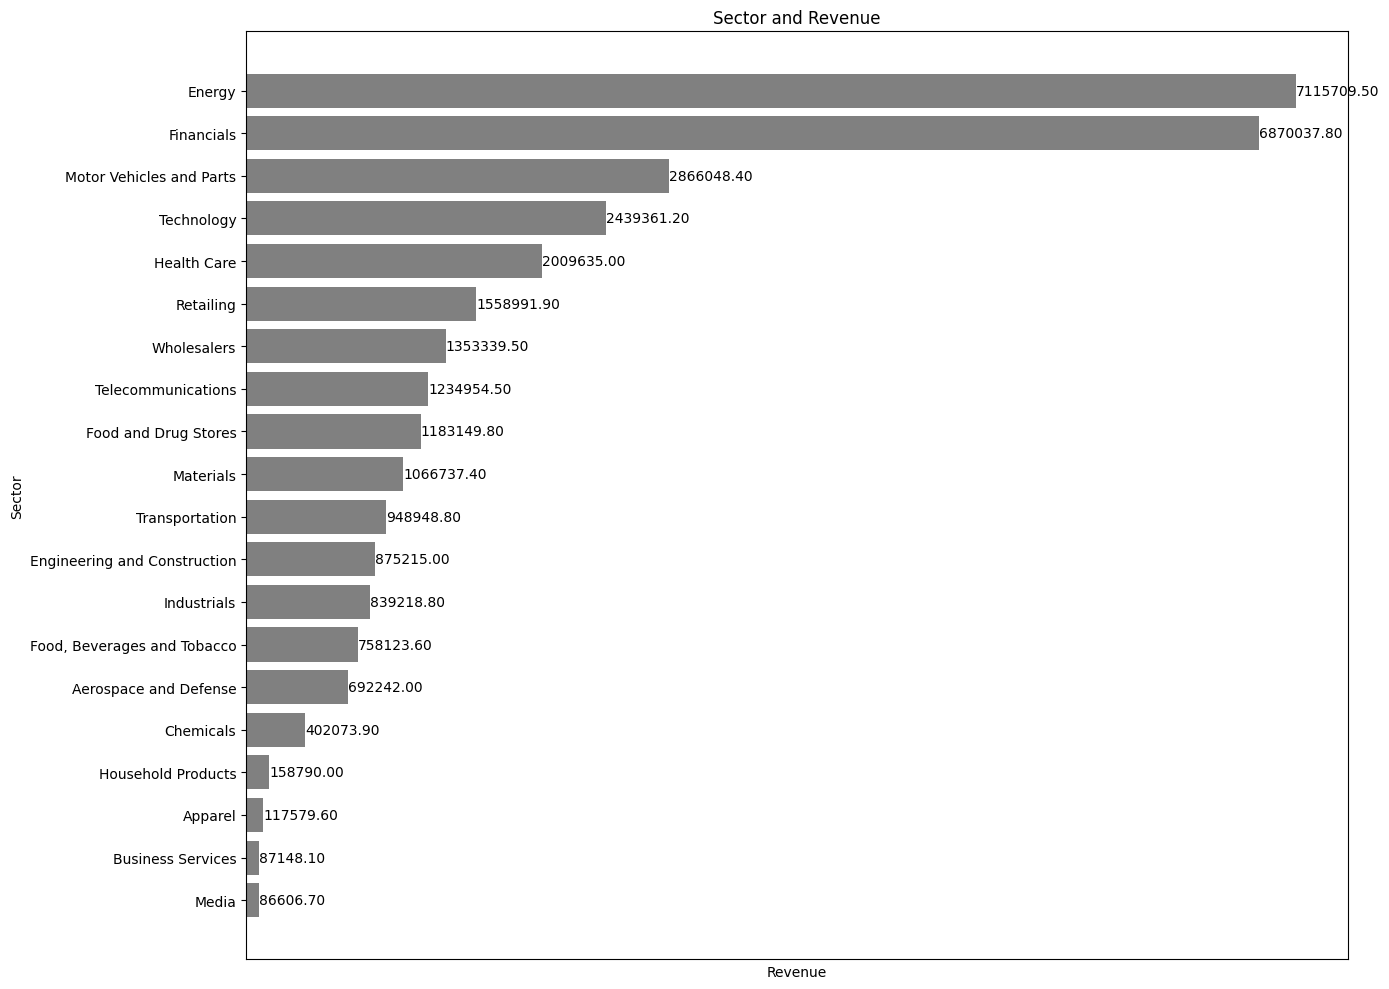

In [51]:
#Let's vizualize some calculations:
filtered_df_plot = df[df['year'] == 2019]

# Group by sector and summarize revenue:
df_2 = filtered_df_plot.groupby(['sector'])['revenues'].sum()

# Sort data ASC:
df_2 = df_2.sort_values(ascending=True)

# Create barchart:
fig, ax = plt.subplots(figsize=(14, 10))
bars = plt.barh(df_2.index, df_2.values, color='grey')

# Titles and labels:
ax.set_xlabel('Revenue')
ax.set_ylabel('Sector')
ax.set_title('Sector and Revenue')
ax.set_xticks([])  # remove x text

# Add titles for bars:
for bar, value in zip(bars, df_2.values):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

Changes in headcount through years:

In [52]:
employees_df=df[['year','employees']]
employees_count_df=employees_df.groupby(['year'], as_index = False).sum('employees').sort_values(
    by=['year'], ascending = True)

employees_count_df['diff']= employees_count_df['employees'].diff()

employees_count_df.fillna(0)


year  employees      diff
0  2019   69264634       0.0
1  2020   69854742  590108.0
2  2021   69746522 -108220.0

We can see that there is growth after 2019 and a decline after 2020, possibly influenced by Covid-2019. Let's take a closer look at the industries:

In [53]:
employees_df=df[['sector','year','employees']]
employees_count_df=employees_df.groupby(['sector','year'], as_index = False).sum('employees').sort_values(
    by=['sector','year'], ascending = True)

employees_count_df

sector  year  employees
0   Aerospace and Defense  2019    2343932
1   Aerospace and Defense  2020    2239136
2   Aerospace and Defense  2021    2134894
3                 Apparel  2019     272030
4                 Apparel  2020     285918
..                    ...   ...        ...
56         Transportation  2020    4694439
57         Transportation  2021    4434167
58            Wholesalers  2019    1341790
59            Wholesalers  2020    1392878
60            Wholesalers  2021    1846262

[61 rows x 3 columns]

In [54]:
#Where are most headquarters located?

filtered_df_2021=df[df['year'] == 2021]
country_count_2021= filtered_df_2021[['year','industry','name','country']]
country_count_2021 = country_count_2021.groupby(['year','country'], as_index = False)['name'].count()
country_count_2021.rename(columns = {'name':'companies_count'}, inplace=True)
country_count_2021.sort_values(by='companies_count',ascending=False,inplace=True)

country_count_2021['%_of_total'] = (country_count_2021['companies_count'] /500) * 100

country_count_2021.head()

year         country  companies_count  %_of_total
4   2021           China              135        27.0
30  2021   United States              120        24.0
13  2021           Japan               45         9.0
8   2021         Germany               27         5.4
7   2021          France               27         5.4

In [55]:
filtered_country_2020=df[df['year'] == 2020]
country_count_2020= filtered_country_2020 [['year','industry','name','country']]
country_count_2020 = country_count_2020.groupby(['year','country'], as_index = False)['name'].count()
country_count_2020.rename(columns = {'name':'companies_count'}, inplace=True)
country_count_2020.sort_values(by='companies_count',ascending=False,inplace=True)

country_count_2020['%_of_total'] = (country_count_2020['companies_count'] /500) * 100

country_count_2020.head()

year         country  companies_count  %_of_total
5   2020           China              124        24.8
32  2020   United States              120        24.0
13  2020           Japan               45         9.0
8   2020          France               32         6.4
9   2020         Germany               28         5.6

In [56]:

filtered_df_2019=df[df['year'] == 2019]
country_count_2019 = filtered_df_2019[['year','industry','name','country']]
country_count_2019 = country_count_2019.groupby(['year','country'], as_index = False)['name'].count()
country_count_2019.rename(columns = {'name':'companies_count'}, inplace=True)
country_count_2019.sort_values(by='companies_count',ascending=False,inplace=True)

country_count_2019['%_of_total'] = (country_count_2019['companies_count'] /500) * 100

country_count_2019.head()

year         country  companies_count  %_of_total
33  2019   United States              120        24.0
5   2019           China              119        23.8
14  2019           Japan               44         8.8
8   2019          France               32         6.4
9   2019         Germany               30         6.0

In [57]:
# the column name "rank" alligns with SQL command RANK , let's change it:
df.rename(columns = {'rank':'rating'}, inplace = True )

In [58]:
#Upload dataframe in the table of database SQLite:
import sqlite3
con = sqlite3.connect('global_500')

In [59]:
df.to_sql(con=con,name='global_500', index=False, if_exists='replace')

1500

In [60]:
sql = """

        select *
        from global_500
     """

df_3 = pd.read_sql_query(sql=sql,con=con)

df_3

year  rating                            name                sector  \
0     2019       1                         Walmart             Retailing   
1     2019       2                   Sinopec Group                Energy   
2     2019       3               Royal Dutch Shell                Energy   
3     2019       4        China National Petroleum                Energy   
4     2019       5                      State Grid                Energy   
...    ...     ...                             ...                   ...   
1495  2021     495                Truist Financial            Financials   
1496  2021     496       China Reinsurance (Group)            Financials   
1497  2021     497  Commonwealth Bank of Australia            Financials   
1498  2021     498                            Flex            Technology   
1499  2021     499                        Rite Aid  Food and Drug Stores   

                                      industry  revenues  revchange  profits  \
0                        General Merchandisers  514405.0        2.8   6670.0   
1                           Petroleum Refining  414649.9       26.8   5845.0   
2                           Petroleum Refining  396556.0       27.2  23352.0   
3                           Petroleum Refining  392976.6       20.5   2270.5   
4                                    Utilities  387056.0       10.9   8174.8   
...                                        ...       ...        ...      ...   
1495             Banks: Commercial and Savings   24427.0       66.6   4482.0   
1496  Insurance: Property and Casualty (Stock)   24376.0       18.1    827.6   
1497             Banks: Commercial and Savings   24362.0      -18.7   6457.1   
1498            Electronics, Electrical Equip.   24124.0       -0.4    613.0   
1499                      Food and Drug Stores   24043.4        9.6    -90.9   

      prftchange    assets  employees       hqcity          hqstate newcomer  \
0          -32.4  219295.0    2200000  Bentonville         Arkansas       no   
1          280.1  329186.3     619151      Beijing  Not in the U.S.       no   
2           79.9  399194.0      81000    The Hague  Not in the U.S.       no   
3            0.0  601899.9    1382401      Beijing  Not in the U.S.       no   
4          -14.3  572309.5     917717      Beijing  Not in the U.S.       no   
...          ...       ...        ...          ...              ...      ...   
1495        39.0  509228.0      53638    Charlotte   North Carolina      yes   
1496        -5.5   69513.7      63914      Beijing  Not in the U.S.      yes   
1497         5.4  698585.9      43585       Sydney  Not in the U.S.       no   
1498       599.9   15836.0     167201    Singapore  Not in the U.S.      yes   
1499         0.0    9335.4      50000    Camp Hill     Pennsylvania      yes   

     ceowoman         country ticker  
0          no   United States    WMT  
1          no           China    N/A  
2          no     Netherlands    N/A  
3          no           China    N/A  
4          no           China    N/A  
...       ...             ...    ...  
1495       no   United States    TFC  
1496       no           China    N/A  
1497       no       Australia    N/A  
1498      yes       Singapore   FLEX  
1499       no   United States    RAD  

[1500 rows x 17 columns]